In [9]:
# import all relevant libraries dependencies and set up the backend
import qsharp
import numpy as np
import matplotlib.pyplot as plt
from qsharp import Result
from Quantum.Isinglattice import Evolve, EvolveSingleTimestepDummy

c1_a = '#003AF0'
c2_a = '#008F24'
c3_a = '#FE7B22'
c4_a = '#FE000C'
c5_a = '#FB30F2'
c6_a = '#82E0AA'
c7_a = '#9966CC'
c8_a = '#7FFFD4'
c9_a = '#66FF00'
c10_a = '#8B008B'
c11_a = '#000000'
colors = [c1_a,c2_a,c3_a,c4_a,c5_a,c6_a,c7_a,c8_a,c9_a,c10_a,c11_a]

# Time Evolution

Assumes an L x W lattice of sites and expects list length JW to specify hx and hz specified for each site and a matrix J (LW x LW) specified for the couplings. Evolves under Hamiltonian
H ≔ - J Σ'ᵢⱼ Zᵢ Zⱼ - hZ Σᵢ Zᵢ - hX Σᵢ Xᵢ

Can specify the couplings which then builds the J array based on these being the couplings over distance or can specify the J matrix yourself.

Expects initial state of correct shape in 0s and 1s (Z basis) to be specified.

In [6]:
# define system parameters
L = 2
W = 4
couplings = [0., 0.5, 0.1]
hx = [0.5 for _ in range(L * W)]
hz = [0. for _ in range(L * W)]
dt = 0.01
total_time = 5.0
ave = 50
J = [[0. for _ in range(L * W)] for _ in range(L * W)]
for i in range(L * W):
    for j in range(L * W):
        s_r, s_c = i // W, i % W
        t_r, t_c = j // W, j % W
        if s_r == t_r:
            h_dist = min([abs(s_c - t_c), W - abs(s_c - t_c)])
            J[i][j] = couplings[h_dist]
        elif s_c == t_c:
            v_dist = min([abs(s_r - t_r), L - abs(s_r - t_r)])
            J[i][j] = couplings[v_dist]
times = np.linspace(0, total_time, num=10)
initial_state = [[0, 1, 0, 0],
                 [0, 0, 0, 0]]

In [7]:
# run evolution
result = np.zeros((len(times), *np.array(initial_state).shape))
flat_initial_state = [item for sub in initial_state for item in sub]
for _ in range(ave):
    for i, t in enumerate(times):
        res = Evolve.simulate(initialState=flat_initial_state,
                              time=t, dt=dt,
                              hx=hx, hz=hz, J=J)
        result[i] += np.array(res).reshape(np.array(initial_state).shape) / ave

NameError: name 'Evolve' is not defined

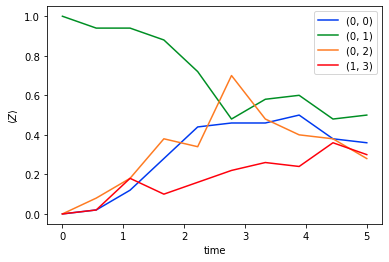

In [12]:
# plot
fig = plt.figure()
qubits = [(0, 0), (0, 1), (0, 2), (1, 3)]
for i, q in enumerate(qubits):
    plt.plot(times, result[:, q[0], q[1]], label='{}'.format(q), color=colors[i])
plt.xlabel('time')
plt.ylabel(r'$\langle Z\rangle$')
plt.legend();

In [13]:
# estimate resources
full_gatecount = Evolve.estimate_resources(initialState=flat_initial_state,
                                           time=times[-1], dt=dt, hx=hx, hz=hz, J=J)
timestep_gatecount = EvolveSingleTimestepDummy.estimate_resources(dt=dt, hx=hx, hz=hz, J=J,
                                                                  nSites=len(flat_initial_state))

print('Full Evolution')
print(*['\t{}: {}\n'.format(k, v) for k, v in full_gatecount.items()])
print('Single Timestep')
print(*['\t{}: {}\n'.format(k, v) for k, v in timestep_gatecount.items()])

Full Evolution
	CNOT: 28000
 	QubitClifford: 1
 	R: 22000
 	Measure: 8
 	T: 0
 	Depth: 0
 	Width: 8
 	BorrowedWidth: 0

Single Timestep
	CNOT: 56
 	QubitClifford: 0
 	R: 44
 	Measure: 0
 	T: 0
 	Depth: 0
 	Width: 8
 	BorrowedWidth: 0



## Outstanding
- Get depth to measure not just T gates
- Improve parallelism